In this project, first we are going to implement a basic sentimental analysis using NLTK and then a more complex analysis using pretrained model BERT for a bunch of Amazon Food Reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk, datetime, re, warnings
warnings.filterwarnings("ignore")

In [32]:
# Download necessary files for the project
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
# Read and little EDA for the reviews
df = pd.read_csv('reviews.csv')

# Check the head of the data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: title={'center': 'Score Distribution'}, xlabel='Score'>

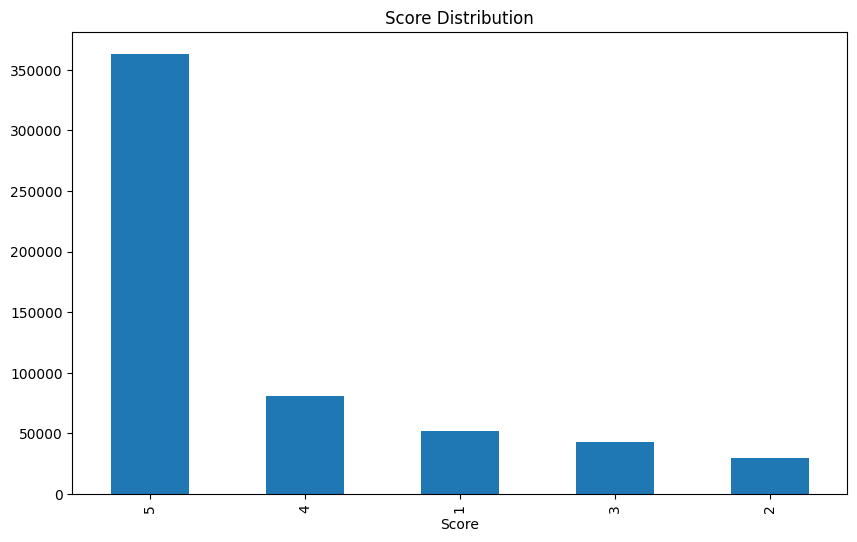

In [34]:
df['Score'].value_counts().plot(kind='bar', figsize=(10, 6), title='Score Distribution')

In [35]:
# Convert Unix timestamp to more readable date
df['New_Time'] = [datetime.datetime.utcfromtimestamp(x) for x in df['Time']]

In [36]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New_Time
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


In [37]:
df['Day week'] = df['New_Time'].dt.day_of_week
df['Year'] = df['New_Time'].dt.year
df['Month'] = df['New_Time'].dt.strftime('%B')

Text(0.5, 1.0, 'Day week Distribution')

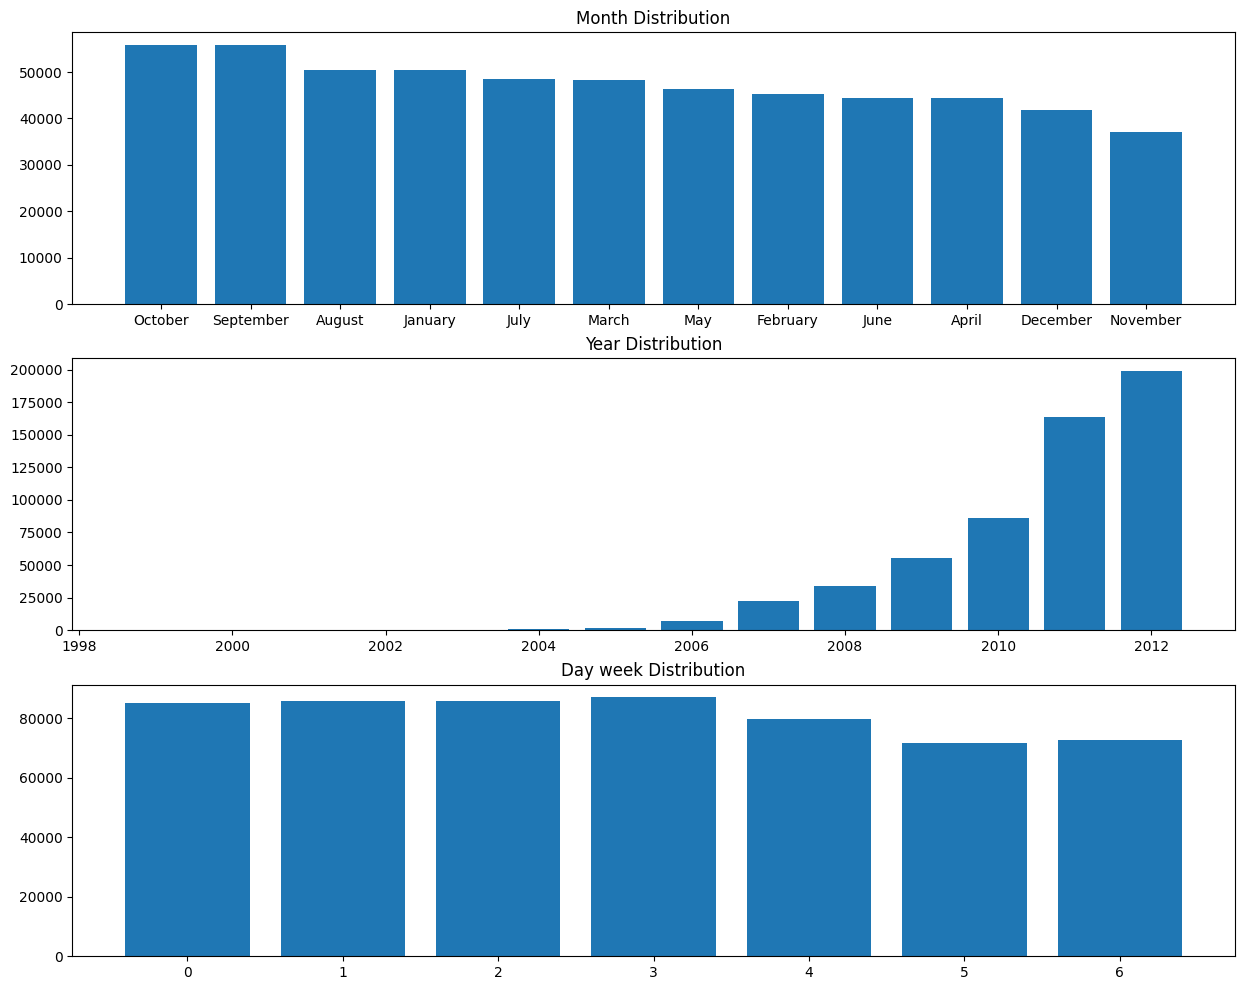

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

ax1.bar(df['Month'].value_counts().index, df['Month'].value_counts().values)
ax1.set_title('Month Distribution')
ax2.bar(df['Year'].value_counts().index, df['Year'].value_counts().values)
ax2.set_title('Year Distribution')
ax3.bar(df['Day week'].value_counts().index, df['Day week'].value_counts().values)
ax3.set_title('Day week Distribution')

Basic NLTK and NLP demostration

In [39]:
example_text = df['Text'][100]
example_text

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [40]:
# Clean up a little the text
cleaned_str = re.sub(r'[^A-Za-z\s]', '', example_text)
cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip()  # Remove extra spaces and trim
cleaned_str

'The mouth says How do I love thee let me count the waysbr If you like apple products a must have item The only draw back shipping cost These are very heavy'

In [41]:
tokenizer = nltk.word_tokenize(cleaned_str, preserve_line=True)
print(tokenizer)

['The', 'mouth', 'says', 'How', 'do', 'I', 'love', 'thee', 'let', 'me', 'count', 'the', 'waysbr', 'If', 'you', 'like', 'apple', 'products', 'a', 'must', 'have', 'item', 'The', 'only', 'draw', 'back', 'shipping', 'cost', 'These', 'are', 'very', 'heavy']


In [42]:
clean = []
for i in df['Text']:
    text_clean = re.sub(r'[^A-Za-z\s]', '', i)
    text_clean = re.sub(r'\s+', ' ', text_clean).strip()
    clean.append(text_clean)

df['clean_text'] = clean

In [43]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New_Time,Day week,Year,Month,clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2,2011,April,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,4,2012,September,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,0,2008,August,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,0,2011,June,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,6,2012,October,Great taffy at a great price There was a wide ...


In [44]:
# Tag the words in a all phrase to improve the analysis using the averaged_perceptron_tagger model in NLTK
nltk.pos_tag(tokenizer)

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT'),
 ('waysbr', 'NN'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('products', 'NNS'),
 ('a', 'DT'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('item', 'NN'),
 ('The', 'DT'),
 ('only', 'JJ'),
 ('draw', 'NN'),
 ('back', 'RB'),
 ('shipping', 'VBG'),
 ('cost', 'NN'),
 ('These', 'DT'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('heavy', 'JJ')]

In [45]:
# 1 Model - VADER Sentiment Scoring Model
from nltk.sentiment.vader import SentimentIntensityAnalyzer

model = SentimentIntensityAnalyzer()

In [46]:
model.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [47]:
model.polarity_scores('This is so bad!')

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.6988}

This model assign a negative, neutral and positive for each word to get a compound, more positive value (max 1) is a positive sentiment and more negative value (max -1) is negative sentiment

In [48]:
df = df.head(1000) # Since this is for learning purposes, we limit the number of rows to 1000

In [49]:
# Do the sentiment analysis for all the text
results ={}
for i, row in df.iterrows():
    results[row.Id] = model.polarity_scores(row.clean_text)

In [51]:
sentiment_results = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Id', 'neg': 'vader_negative', 'neu': 'vader_neutral', 'pos': 'vader_positive', 'compound': 'vader_compound'})
df_results = pd.merge(df, sentiment_results, on='Id')
df_results.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New_Time,Day week,Year,Month,clean_text,vader_negative,vader_neutral,vader_positive,vader_compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2,2011,April,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,4,2012,September,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,0,2008,August,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,0,2011,June,If you are looking for the secret ingredient i...,0.000,0.925,0.075,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,6,2012,October,Great taffy at a great price There was a wide ...,0.000,0.552,0.448,0.9468


Text(0.5, 1.0, 'Compound Score by Sentiment Score')

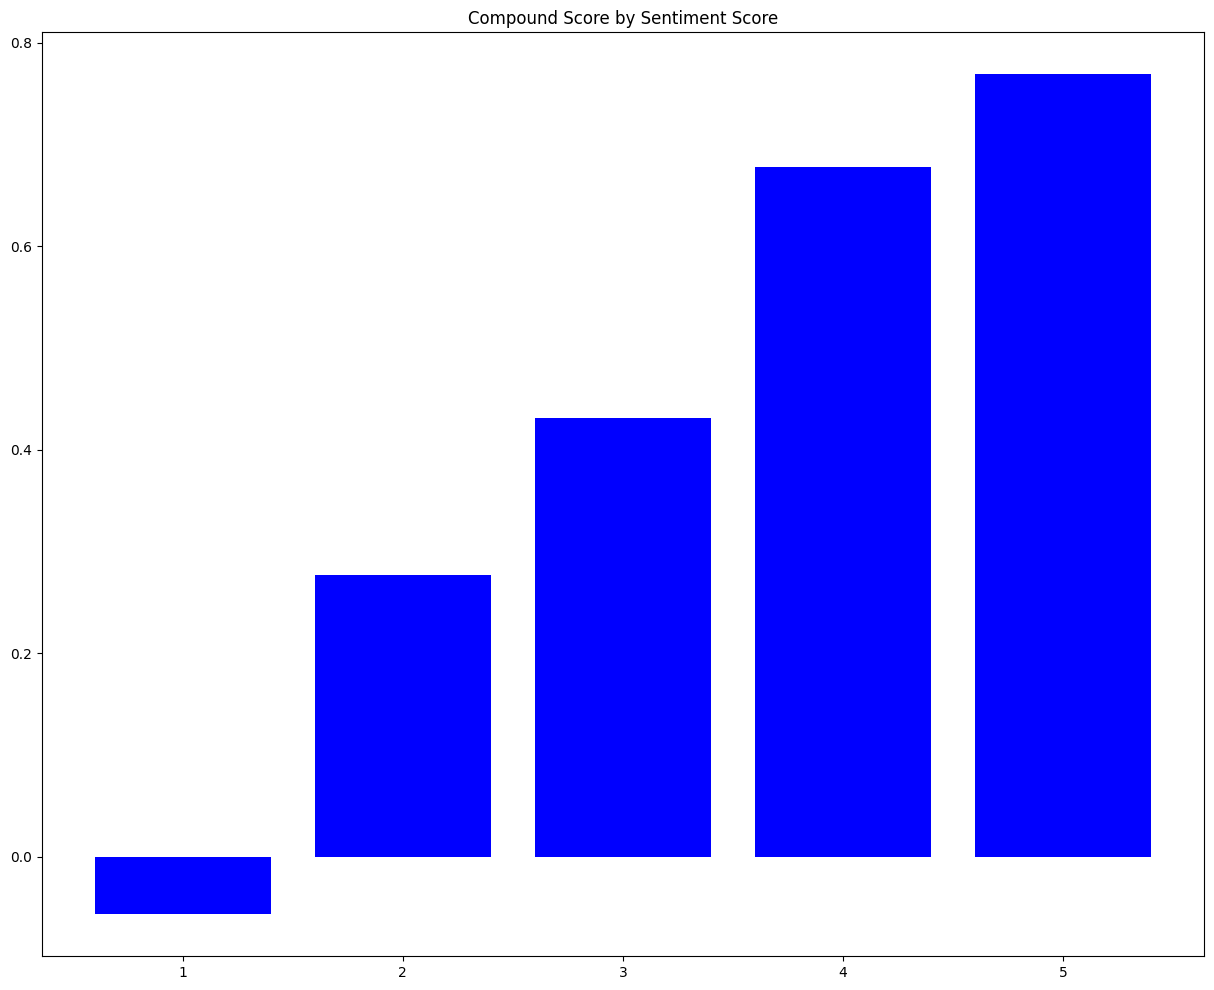

In [53]:
x = list(df_results[['Score', 'vader_compound']].groupby('Score').mean().index)
y = list(df_results[['Score', 'vader_compound']].groupby('Score').mean()['vader_compound'].values)
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 12))

ax1.bar(x, y, color='blue')
ax1.set_title('Compound Score by Sentiment Score')

Since the previous model just look for each word and assign a score to each one, we will use other pretrained model to include the context in the score, this model is the famous RoBERTa (A Robustly Optimized BERT Pretraining Approach)

In [5]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [72]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

In [73]:
example = df_results['Text'][0]
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [74]:
# Apply RoBERTa model in an example
encode_text = tokenizer(example, return_tensors='pt') # pytorch tensor
output_score = model(**encode_text)
array_results = output_score[0][0].detach().numpy() # convert the result in a numpy array
score = softmax(array_results) # get the score in percentage (negative - neutral - positive)
df_example_results = pd.DataFrame(score).T # convert the score in a dataframe.T
df_example_results.rename(columns={0: 'negative', 1: 'neutral', 2: 'positive'}, inplace=True) # rename the columns
df_example_results['text'] = example
df_example_results

,negative,neutral,positive,text
0,0.009624,0.04998,0.940395,I have bought several of the Vitality canned d...


In [77]:
# Apply RoBERTa model in a batch
results = {}
for i, row in df_results.iterrows():
    try:
        encode_text = tokenizer(row.clean_text, return_tensors='pt')
        output_score = model(**encode_text)[0][0].detach().numpy()
        results[row.Id] = softmax(output_score)
    except:
        print(f'Error on row {i} - text: {row.clean_text} - Id: {row.Id} - Skipping')
        continue
results # This maybe will break with differents text because are too big and this specific cannot handle it

Error on row 528 - text: I once loved these chips and they were the only chips i would buy I discovered them when I was in England back in and quickly became a fan About a year ago I picked up a bag that was on sale at my local supermarket I was finding it odd that they were on sale so much but took advantage of it After opening the bag I found the chips were not even close to the Kettle chips I was used to They were all uniform whitish yellow in color flavor was way off the lovely extra crisp brown chips were gone completely and I was very disappointed So I emailed Kettle with the following What Happened I bought this bag of chips the other day and they have a very different taste It tastes cheaper I dont know how else to put it I also noticed that the chips seemed to be less cooked as I did not see any of the browner colored chips that have the most flavor I am hoping that nothing has changed with the ingredients or process used to produce this product Did I just get a weird batch I 

{1: array([0.00570066, 0.03395431, 0.96034503], dtype=float32),
 2: array([0.44261143, 0.524039  , 0.03334963], dtype=float32),
 3: array([0.00183709, 0.08324405, 0.91491884], dtype=float32),
 4: array([0.00142421, 0.05696414, 0.94161165], dtype=float32),
 5: array([0.00158212, 0.01028604, 0.9881319 ], dtype=float32),
 6: array([0.01375994, 0.04408966, 0.94215035], dtype=float32),
 7: array([0.00159895, 0.00822279, 0.9901782 ], dtype=float32),
 8: array([0.00197345, 0.00673434, 0.9912922 ], dtype=float32),
 9: array([0.00309711, 0.10438035, 0.8925226 ], dtype=float32),
 10: array([0.00307535, 0.04939301, 0.9475317 ], dtype=float32),
 11: array([0.01856907, 0.08735044, 0.89408046], dtype=float32),
 12: array([0.26823753, 0.6384673 , 0.09329515], dtype=float32),
 13: array([0.4922811 , 0.40198356, 0.10573539], dtype=float32),
 14: array([0.00177356, 0.00666716, 0.9915592 ], dtype=float32),
 15: array([0.00187854, 0.02176608, 0.9763554 ], dtype=float32),
 16: array([0.0021149 , 0.01478316

In [79]:
roberta_results = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Id'})
roberta_results.rename(columns={0: 'roberta_negative', 1: 'roberta_neutral', 2: 'roberta_positive'}, inplace=True)
df_all_results = pd.merge(df_results, roberta_results, on='Id')
df_all_results.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Year,Month,clean_text,vader_negative,vader_neutral,vader_positive,vader_compound,roberta_negative,roberta_neutral,roberta_positive
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,2011,April,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,0.005701,0.033954,0.960345
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,2012,September,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,0.442611,0.524039,0.033350
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,2008,August,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,0.001837,0.083244,0.914919
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,2011,June,If you are looking for the secret ingredient i...,0.000,0.925,0.075,0.4404,0.001424,0.056964,0.941612
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,2012,October,Great taffy at a great price There was a wide ...,0.000,0.552,0.448,0.9468,0.001582,0.010286,0.988132


Text(0.5, 1.0, 'roberta_neutral')

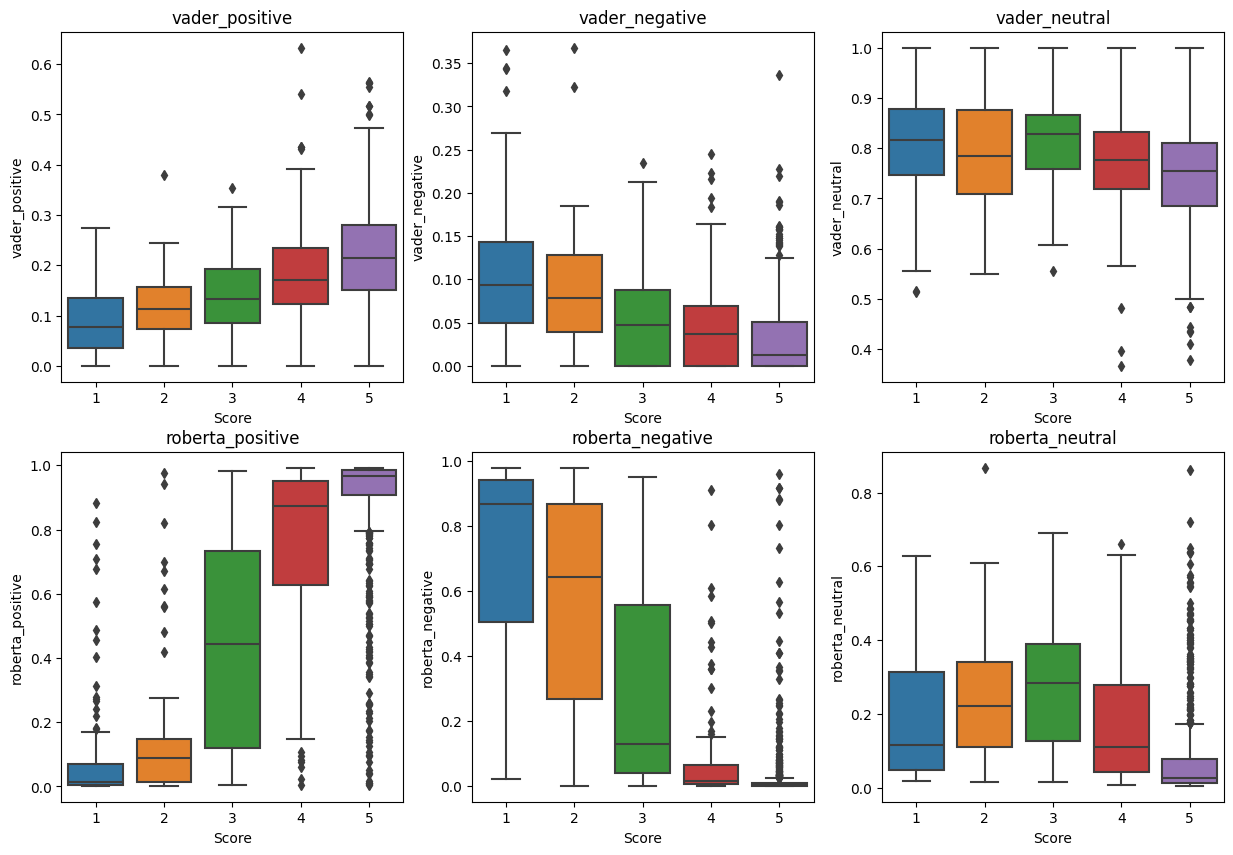

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(data=df_all_results, x="Score", y="vader_positive", ax=axes[0, 0])
axes[0, 0].set_title("vader_positive")


sns.boxplot(data=df_all_results, x="Score", y="vader_negative", ax=axes[0, 1])
axes[0, 1].set_title("vader_negative")


sns.boxplot(data=df_all_results, x="Score", y="vader_neutral", ax=axes[0, 2])
axes[0, 2].set_title("vader_neutral")


sns.boxplot(data=df_all_results, x="Score", y="roberta_positive", ax=axes[1, 0])
axes[1, 0].set_title("roberta_positive")


sns.boxplot(data=df_all_results, x="Score", y="roberta_negative", ax=axes[1, 1])
axes[1, 1].set_title("roberta_negative")


sns.boxplot(data=df_all_results, x="Score", y="roberta_neutral", ax=axes[1, 2])
axes[1, 2].set_title("roberta_neutral")